In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [6]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

In [12]:
custom_palette = ['#33A4FF', '#FFB733', '#9FF767']
sns.set_palette(custom_palette)

In [2]:
df = pd.read_csv("diabete.csv")
df

,sex,age_range,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,...,sight_right,hear_left,hear_right,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,1,1,90.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,...,1.0,0,0,21.0,35.0,40.0,1,1,25.951557,0
1,1,1,89.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,...,1.2,0,0,20.0,36.0,27.0,3,0,24.691358,1
2,1,2,91.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,...,1.5,0,0,47.0,32.0,68.0,1,0,27.548209,0
3,1,3,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,...,1.2,0,0,29.0,34.0,18.0,1,0,26.122449,0
4,1,3,80.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,...,1.2,0,0,19.0,12.0,25.0,1,0,22.038567,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,2,92.1,114.0,80.0,88.0,198.0,46.0,125.0,132.0,...,1.5,0,0,26.0,36.0,27.0,1,0,26.122449,0
991342,1,1,86.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,...,1.5,0,0,14.0,17.0,15.0,1,0,25.951557,0
991343,0,2,68.0,110.0,70.0,90.0,205.0,96.0,77.0,157.0,...,0.7,0,0,30.0,27.0,17.0,3,1,20.811655,0
991344,1,0,72.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,...,1.0,0,0,21.0,14.0,17.0,1,0,19.591837,0


In [7]:
df

,sex,age_range,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,sight_left,sight_right,hear_left,hear_right,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,1,1,90.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1,1.0,1.0,1.0,0,0,21.0,35.0,40.0,1,1,25.951557,0
1,1,1,89.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1,0.9,0.9,1.2,0,0,20.0,36.0,27.0,3,0,24.691358,1
2,1,2,91.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1,0.9,1.2,1.5,0,0,47.0,32.0,68.0,1,0,27.548209,0
3,1,3,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1,1.1,1.5,1.2,0,0,29.0,34.0,18.0,1,0,26.122449,0
4,1,3,80.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1,0.8,1.0,1.2,0,0,19.0,12.0,25.0,1,0,22.038567,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,2,92.1,114.0,80.0,88.0,198.0,46.0,125.0,132.0,15.0,1,1.0,1.5,1.5,0,0,26.0,36.0,27.0,1,0,26.122449,0
991342,1,1,86.0,119.0,83.0,83.0,133.0,40.0,84.0,45.0,15.8,1,1.1,1.0,1.5,0,0,14.0,17.0,15.0,1,0,25.951557,0
991343,0,2,68.0,110.0,70.0,90.0,205.0,96.0,77.0,157.0,14.3,1,0.8,1.0,0.7,0,0,30.0,27.0,17.0,3,1,20.811655,0
991344,1,0,72.0,119.0,74.0,69.0,122.0,38.0,73.0,53.0,14.5,1,0.8,1.5,1.0,0,0,21.0,14.0,17.0,1,0,19.591837,0


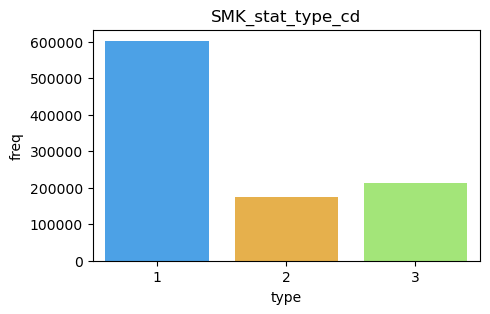

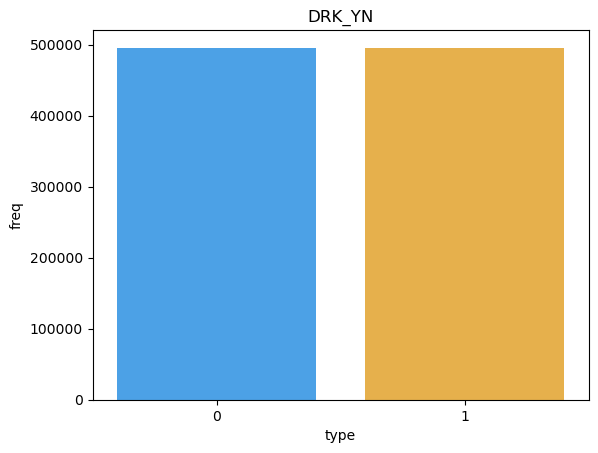

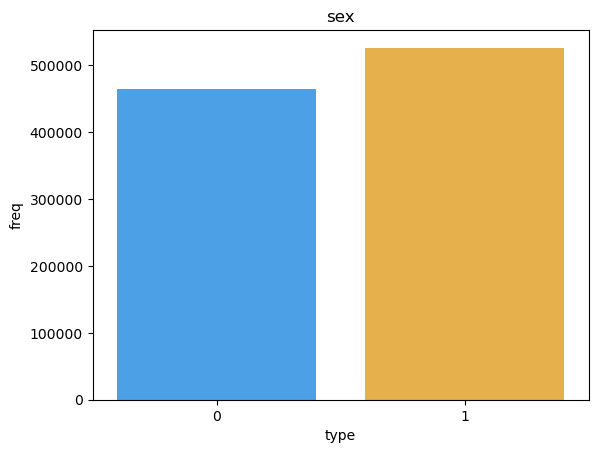

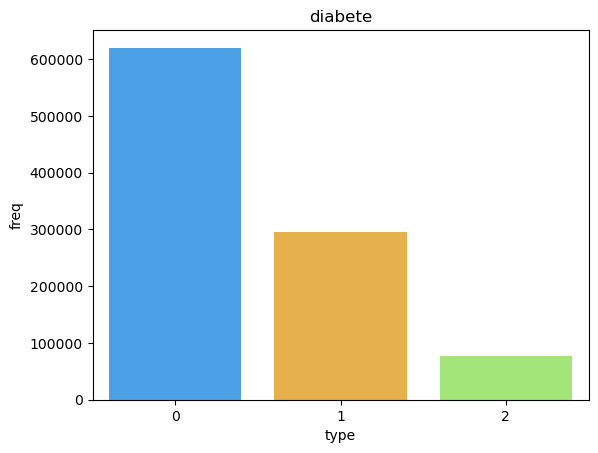

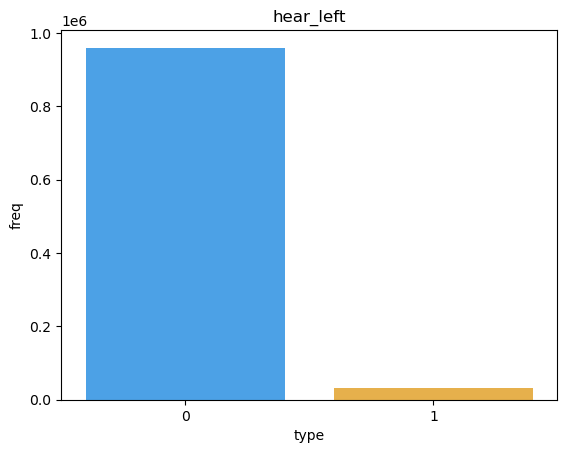

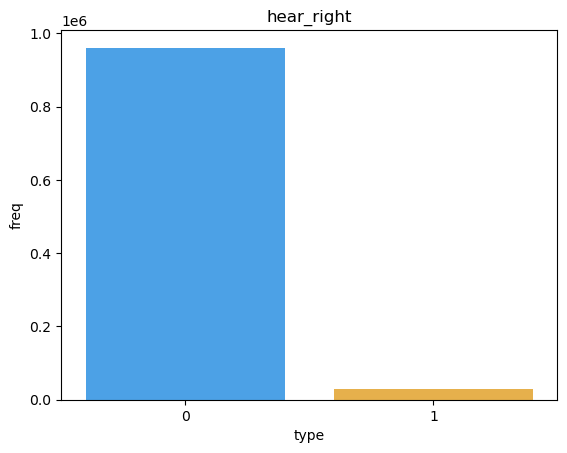

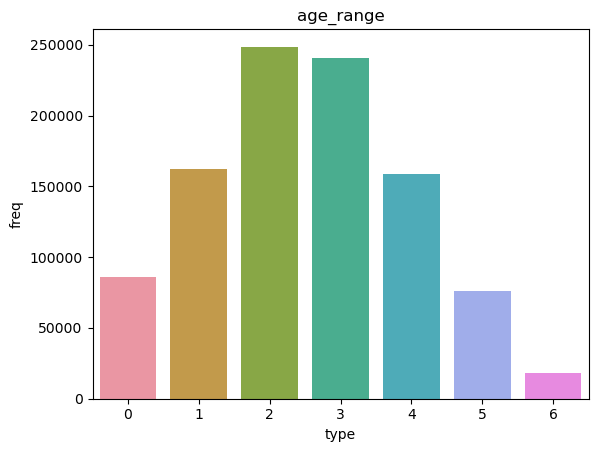

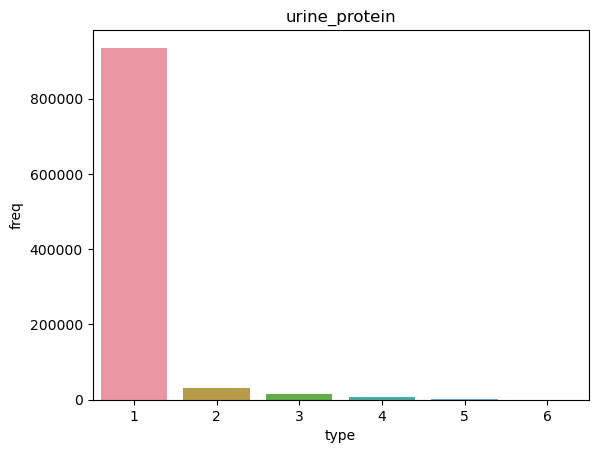

In [13]:
cate_list = ["SMK_stat_type_cd", "DRK_YN", "sex", "diabete", "hear_left", "hear_right", "age_range", "urine_protein"]

fig, ax = plt.subplots(1, figsize=(5, 3))

for i in range(len(cate_list)):
    freq = df[cate_list[i]].value_counts().reset_index()
    freq.columns = ['type','freq']
    sns.barplot(x = "type", y = "freq", data = freq)
    plt.title(cate_list[i])
    plt.show()

In [14]:
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
smoteto

SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

In [17]:
X, y = smoteto.fit_resample(df[:100000].drop(["diabete"], axis = 1), df[:100000]["diabete"])

In [18]:
X['diabete'] = y
X

,sex,age_range,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,sight_left,sight_right,hear_left,hear_right,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,1,1,90.000000,120.000000,80.000000,99.000000,193.000000,48.000000,126.000000,92.000000,17.100000,1,1.000000,1.000000,1.000000,0,0,21.000000,35.000000,40.000000,1,1,25.951557,0
1,1,1,89.000000,130.000000,82.000000,106.000000,228.000000,55.000000,148.000000,121.000000,15.800000,1,0.900000,0.900000,1.200000,0,0,20.000000,36.000000,27.000000,3,0,24.691358,1
2,1,2,91.000000,120.000000,70.000000,98.000000,136.000000,41.000000,74.000000,104.000000,15.800000,1,0.900000,1.200000,1.500000,0,0,47.000000,32.000000,68.000000,1,0,27.548209,0
3,1,3,91.000000,145.000000,87.000000,95.000000,201.000000,76.000000,104.000000,106.000000,17.600000,1,1.100000,1.500000,1.200000,0,0,29.000000,34.000000,18.000000,1,0,26.122449,0
4,1,3,80.000000,138.000000,82.000000,101.000000,199.000000,61.000000,117.000000,104.000000,13.800000,1,0.800000,1.000000,1.200000,0,0,19.000000,12.000000,25.000000,1,0,22.038567,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187081,1,4,90.627601,128.304977,78.304977,129.524887,205.219910,70.507241,109.102714,126.049775,16.334027,1,1.000000,0.476244,0.321991,0,0,29.897286,27.340270,90.982354,2,0,25.354870,2
187082,1,2,79.286921,131.011360,82.528401,161.792601,181.539761,42.758520,105.022721,167.781241,16.146024,1,0.974716,1.073580,0.873580,0,0,33.252840,52.494320,63.241480,2,1,26.797388,2
187083,1,2,92.041991,124.274828,85.106865,161.469451,190.576316,44.809153,94.618307,255.297712,16.340458,1,0.970229,0.670229,0.840458,0,0,58.064874,82.148856,126.870251,2,0,27.661796,2
187084,0,3,80.576918,135.317311,72.528852,127.740393,147.576918,55.105770,76.576918,75.471148,13.725961,1,0.778846,0.868269,0.878846,0,0,24.788459,26.730755,15.576918,1,0,26.457330,2


In [19]:
X.to_csv("DM_up_down_sampling.csv", index = False)

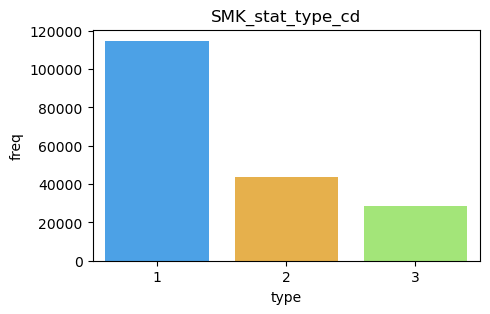

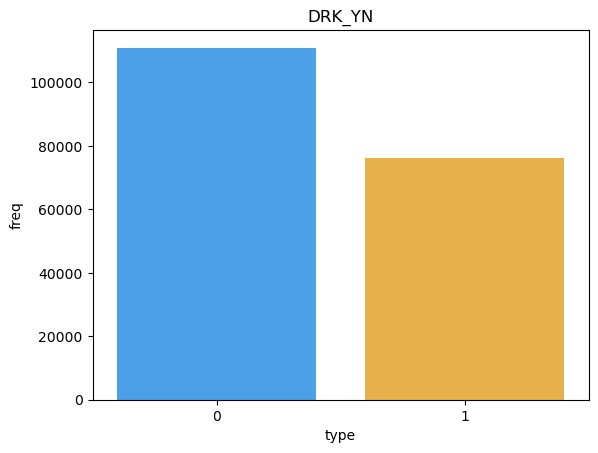

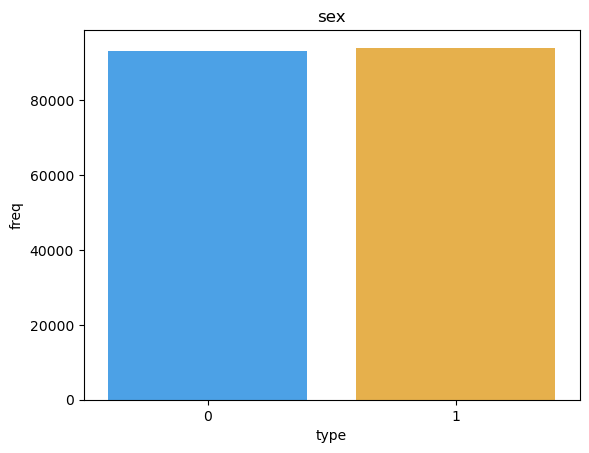

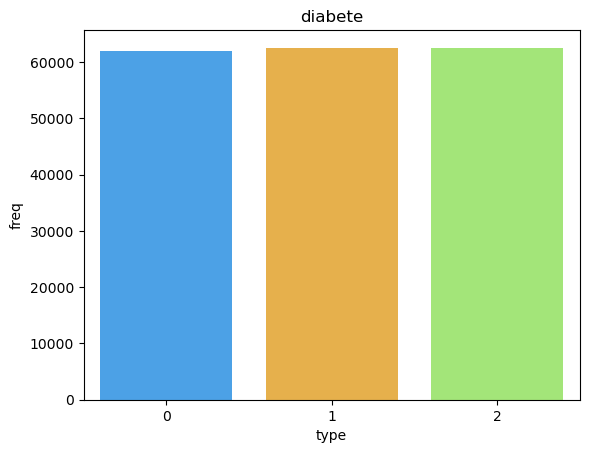

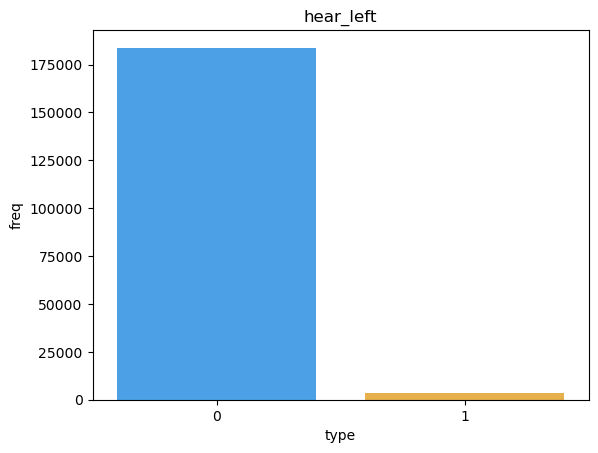

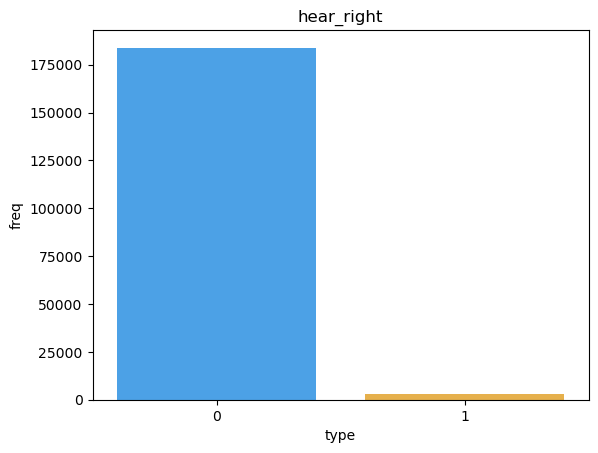

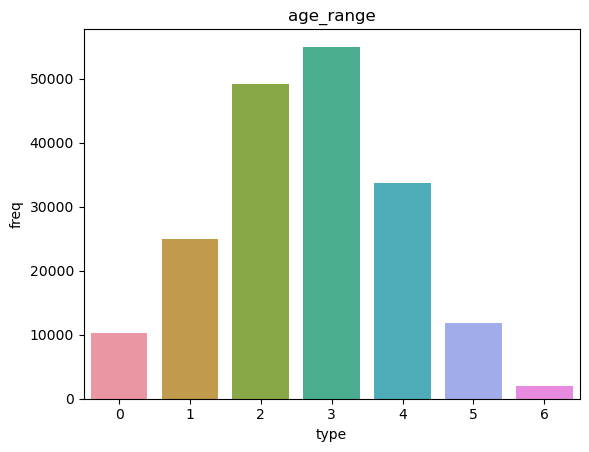

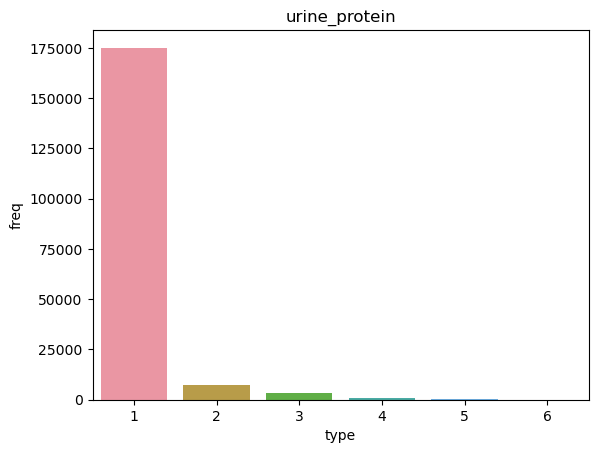

In [20]:
cate_list = ["SMK_stat_type_cd", "DRK_YN", "sex", "diabete", "hear_left", "hear_right", "age_range", "urine_protein"]

fig, ax = plt.subplots(1, figsize=(5, 3))

for i in range(len(cate_list)):
    freq = X[cate_list[i]].value_counts().reset_index()
    freq.columns = ['type','freq']
    sns.barplot(x = "type", y = "freq", data = freq)
    plt.title(cate_list[i])
    plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_dropped = X.drop("diabete", axis = 1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_dropped.values, i) for i in range(df_dropped.shape[1])]
vif["features"] = df_dropped.columns
vif = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)
vif

,VIF,features
0,194.388573,SBP
1,165.497140,DBP
2,137.191855,waistline
3,129.953747,tot_chole
4,120.951014,hemoglobin
5,117.356109,bmi
6,49.114614,LDL_chole
7,11.966602,BLDS
8,8.382037,SGOT_AST
9,8.137125,SMK_stat_type_cd


<AxesSubplot:xlabel='VIF', ylabel='features'>

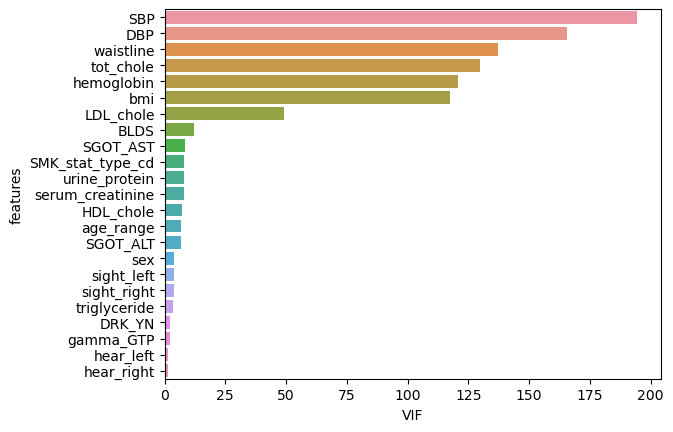

In [22]:
sns.barplot(data = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True),
           y = "features",
           x = "VIF")

<AxesSubplot:>

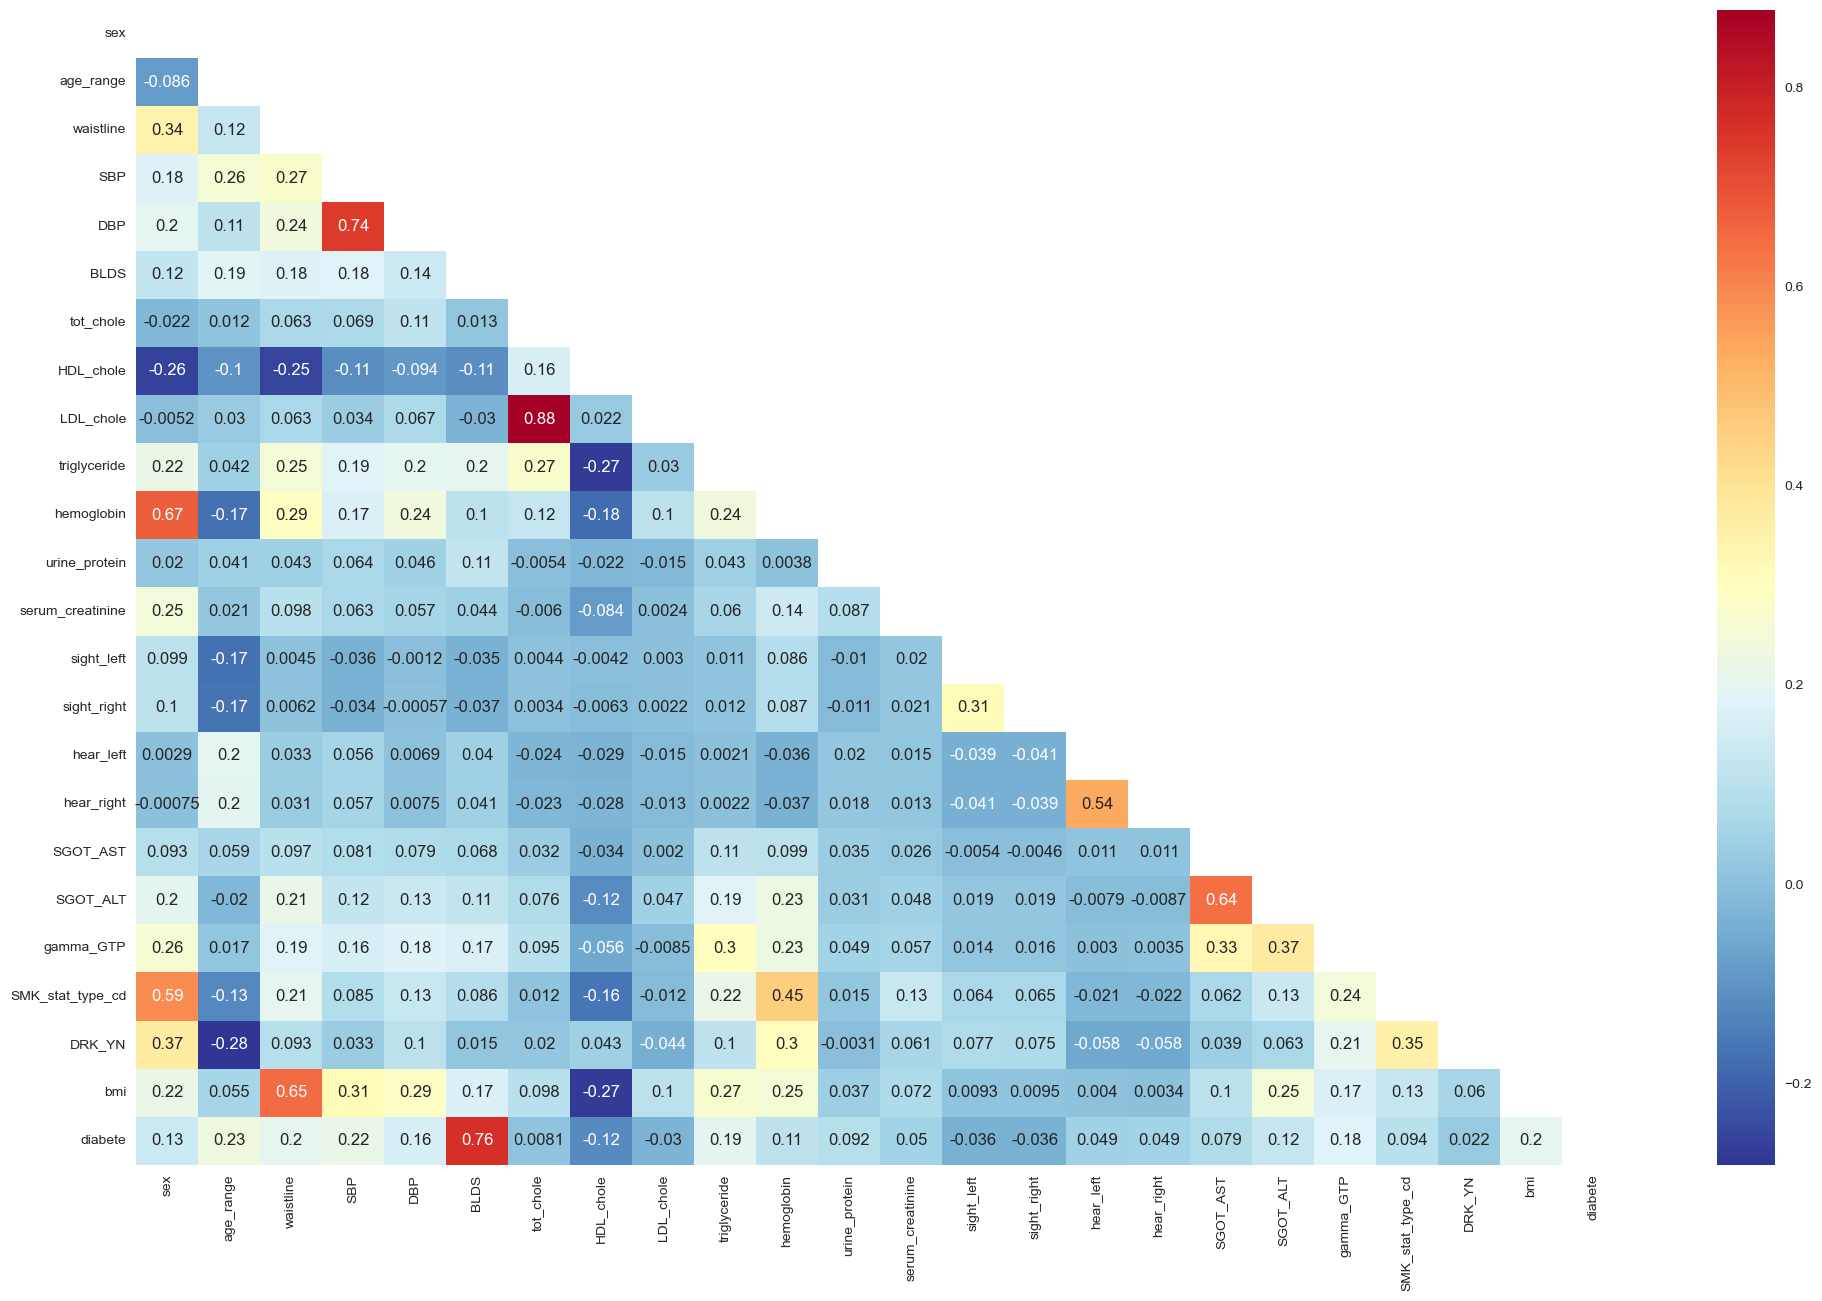

In [24]:
plt.figure(figsize=(24, 15))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),
            cmap = 'RdYlBu_r',
            mask=mask,
            annot=True)

In [23]:
from pycaret.classification import *
exp_name = setup(data =  X,  target = 'diabete')
compare_models(['nb', 'knn', 'ridge', 'svm'])

,Description,Value
0,Session id,4337
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(187086, 24)"
4,Transformed data shape,"(187086, 24)"
5,Transformed train set shape,"(130960, 24)"
6,Transformed test set shape,"(56126, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9315,0.0000,0.9315,0.9417,0.9279,0.8973,0.9039,4.1620
knn,K Neighbors Classifier,0.9270,0.9844,0.9270,0.9290,0.9267,0.8904,0.8917,28.6060
nb,Naive Bayes,0.8774,0.9603,0.8774,0.8792,0.8759,0.8161,0.8184,3.4040
ridge,Ridge Classifier,0.7299,0.0000,0.7299,0.7315,0.7145,0.5950,0.6090,2.3310


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=4337, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
from pycaret.classification import *
exp_name = setup(data =  X.drop("BLDS", axis = 1),  target = 'diabete')
compare_models(['nb', 'knn', 'ridge', 'svm'])

,Description,Value
0,Session id,8747
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(187086, 23)"
4,Transformed data shape,"(187086, 23)"
5,Transformed train set shape,"(130960, 23)"
6,Transformed test set shape,"(56126, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7068,0.8635,0.7068,0.7032,0.6947,0.5599,0.5677,27.7280
ridge,Ridge Classifier,0.5258,0.0000,0.5258,0.5068,0.4990,0.2889,0.2985,2.1010
nb,Naive Bayes,0.5018,0.6895,0.5018,0.5175,0.5051,0.2526,0.2551,3.1310
svm,SVM - Linear Kernel,0.4532,0.0000,0.4532,0.4739,0.3857,0.1798,0.2180,5.0070


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [27]:
X

,sex,age_range,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,...,sight_right,hear_left,hear_right,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,1,1,90.000000,120.000000,80.000000,99.000000,193.000000,48.000000,126.000000,92.000000,...,1.000000,0,0,21.000000,35.000000,40.000000,1,1,25.951557,0
1,1,1,89.000000,130.000000,82.000000,106.000000,228.000000,55.000000,148.000000,121.000000,...,1.200000,0,0,20.000000,36.000000,27.000000,3,0,24.691358,1
2,1,2,91.000000,120.000000,70.000000,98.000000,136.000000,41.000000,74.000000,104.000000,...,1.500000,0,0,47.000000,32.000000,68.000000,1,0,27.548209,0
3,1,3,91.000000,145.000000,87.000000,95.000000,201.000000,76.000000,104.000000,106.000000,...,1.200000,0,0,29.000000,34.000000,18.000000,1,0,26.122449,0
4,1,3,80.000000,138.000000,82.000000,101.000000,199.000000,61.000000,117.000000,104.000000,...,1.200000,0,0,19.000000,12.000000,25.000000,1,0,22.038567,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187081,1,4,90.627601,128.304977,78.304977,129.524887,205.219910,70.507241,109.102714,126.049775,...,0.321991,0,0,29.897286,27.340270,90.982354,2,0,25.354870,2
187082,1,2,79.286921,131.011360,82.528401,161.792601,181.539761,42.758520,105.022721,167.781241,...,0.873580,0,0,33.252840,52.494320,63.241480,2,1,26.797388,2
187083,1,2,92.041991,124.274828,85.106865,161.469451,190.576316,44.809153,94.618307,255.297712,...,0.840458,0,0,58.064874,82.148856,126.870251,2,0,27.661796,2
187084,0,3,80.576918,135.317311,72.528852,127.740393,147.576918,55.105770,76.576918,75.471148,...,0.878846,0,0,24.788459,26.730755,15.576918,1,0,26.457330,2
